In [1]:

from keras import models
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
#Step1. Preparing the data
dataset_path = 'heart.csv'

dataset = pd.read_csv(dataset_path)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#This datasert contains 303 samples
dataset['target'].count()

303

In [4]:
#here I split train, eval and test sets
train_dataset = dataset[:200]
eval_dataset = dataset[200:250]
test_dataset = dataset[250:]

In [5]:
#extracting labels from the datasets (labels are 1 - healthy and 0 - unhealthy heart)
train_labels = train_dataset.pop('target')
eval_labels = eval_dataset.pop('target')
test_labels = test_dataset.pop('target')

In [6]:
train_labels.count()

200

In [7]:
#STEP 2. Defining a model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (13,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [33]:
#STEP 3. Compiling the model
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.000),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [40]:
#STEP 4. Training the model
history = model.fit(train_dataset,
                    train_labels,
                    epochs = 10,
                    batch_size = 20,
                    validation_data = (eval_dataset, eval_labels)
                    )

Train on 200 samples, validate on 50 samples
Epoch 1/10
200/200 [==============================] - 0s 78us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_accuracy: 0.0000e+00
Epoch 2/10
200/200 [==============================] - 0s 78us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_accuracy: 0.0000e+00
Epoch 3/10
200/200 [==============================] - 0s 78us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_accuracy: 0.0000e+00
Epoch 4/10
200/200 [==============================] - 0s 98us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_accuracy: 0.0000e+00
Epoch 5/10
200/200 [==============================] - 0s 99us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_accuracy: 0.0000e+00
Epoch 6/10
200/200 [==============================] - 0s 145us/step - loss: 2.7899 - binary_accuracy: 0.8250 - val_loss: 15.9424 - val_binary_acc

In [41]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

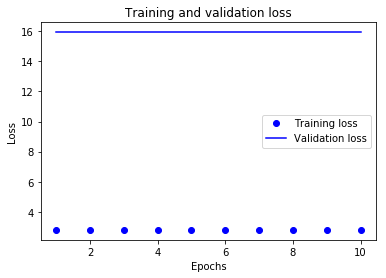

In [42]:
###PLOTTING THE TRAINING AND VALIDATION LOSSES
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['binary_accuracy'])+1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



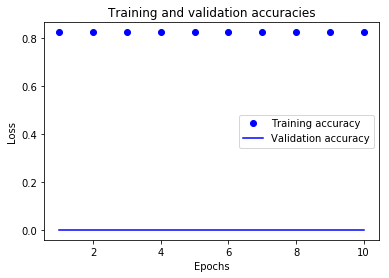

In [43]:
###PLOTTING THE TRAINING AND VALIDATION ACCURACIES

binary_accuracy = history_dict['binary_accuracy']
val_binary_accuracy = history_dict['val_binary_accuracy']

epochs = range(1, len(history_dict['binary_accuracy'])+1)

plt.plot(epochs, binary_accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_binary_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
#STEP 5. Testing the model
model.evaluate(test_dataset, test_labels)


53/53 [==============================] - 0s 0us/step


[15.942384719848633, 0.0]